# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [267]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import Counter
import seaborn as sns
from scipy import stats

In [232]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [233]:
hospital_read_df.head()
hospital_read_df.columns
hospital_read_df.shape
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [234]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.info()
clean_hospital_read_df.shape
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df.shape
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null object
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.1+ MB


/Users/admin/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


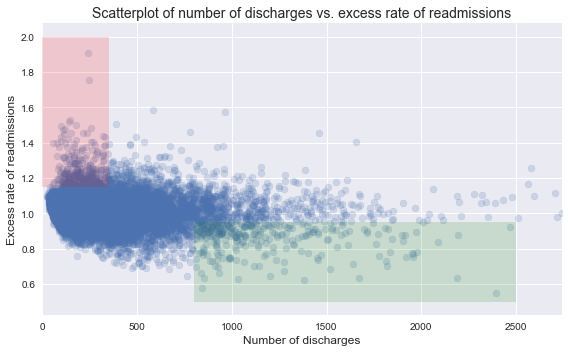

In [235]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = list(clean_hospital_read_df['Number of Discharges'][:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [236]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree. Correlation doesn't necessarily mean causation!
This recommendation can't be accepted based on 2 data points without testing the statistical hypothesis. 


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.
#### Ho: ERR(capacity_100) = ERR (capacity _1000)
#### Ha: ERR(capacity_100) != ERR (capacity_1000)

In [237]:
#mean ERR where NoD < 100
clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]['Excess Readmission Ratio'].mean()
#subset table with filter NoD <100
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
#list ERR from subset above 
b=a['Excess Readmission Ratio'].dropna()
#count ERR < 1
ERR_less_thn_1 = [num for num in b if num <1]
 ## or

#ERR_less_thn_1 = [num for num in b if meetsCondition(num)]

(len(ERR_less_thn_1)/len(b))*100

# or you can use the meetsCondition also,

# divisibleBySeven = [num for num in inputList if meetsCondition(num)]

# you can actually write the same condition with Python's truthy semantics, like this

# divisibleBySeven = [num for num in inputList if num and num % 7]
#clean_hospital_read_df.columns

36.61616161616162

In [238]:
# # of hospitals with cap < 100
dt = clean_hospital_read_df
cap = dt['Number of Discharges'].astype(int)

print('length of Number of Discharges col:', len(cap))
print('null values in Number of Discharges col is:', cap.count(None))


length of Number of Discharges col: 11578
null values in Number of Discharges col is: 11578


In [239]:
dt.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [240]:
dt.describe().loc['mean','Excess Readmission Ratio']

1.0075037835957146

In [259]:
def hosp_type(list):
    c = []
    for num in list:
        if num >= 1000:
            c.append('1K')
        elif 100 < num < 1000:
            c.append('other')
        elif (0 < num <= 100) and num!=None:
            c.append('0.1K')
        else:
            c.append(None)
    return c
            
dt.loc[:,'capacity'] = hosp_type(dt['Number of Discharges'])
dt.groupby('capacity').size()
# dt.capacity.unique() .....this is giving error: AttributeError: 'list' object has no attribute 'unique' find out why
set(dt.capacity)  # set is the function that gives unique values from a list !!!!!!!!!!
pd.Series(dt.capacity).unique()

array([None, '0.1K', 'other', '1K'], dtype=object)

## Check the capacity < 100 population
> Provided: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [242]:
dt_100 = dt[dt['capacity']=='0.1K']
count_dt_100 = len(dt_100) #number of hospitals with capacity <100
dt_100_avg_ERR = dt_100['Excess Readmission Ratio'].mean()
dt_100_std_ERR = dt_100['Excess Readmission Ratio'].std()
# % hospitals that have excess readmission rate greater than 1

b= len(dt_100[dt_100['Excess Readmission Ratio']>1])
pct_ERR_1_100=round((b/count_dt_100)*100,2)
a
b
dt_100_avg_ERR, pct_ERR_1_100

(1.0220883892068686, 62.63)

## Check the capacity < 100 population

> Provided: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [243]:
dt_1000 = dt[dt['capacity']=='1K']
count_dt_1000 = len(dt_1000) #number of hospitals with capacity <100
dt_1000_avg_ERR = dt_1000['Excess Readmission Ratio'].mean()
dt_1000_std_ERR = dt_1000['Excess Readmission Ratio'].std()
# % hospitals that have excess readmission rate greater than 1
b= len(dt_1000[dt_1000['Excess Readmission Ratio']>1])
pct_ERR_1_1000=round((b/count_dt_1000)*100,2)
b
dt_1000_avg_ERR, pct_ERR_1_1000

(0.9783342672413797, 44.4)

## Plot the distributions of ERRs for both sub groups

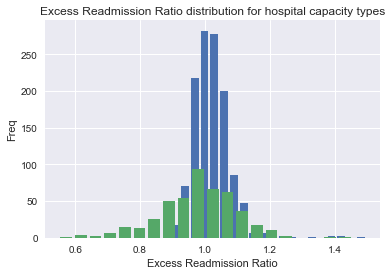

In [244]:
plt.hist(dt_100['Excess Readmission Ratio'], bins = 20, rwidth = 0.8)
plt.hist(dt_1000['Excess Readmission Ratio'], bins = 20, rwidth = 0.8)
plt.title('Excess Readmission Ratio distribution for hospital capacity types')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Freq')
plt.show()

## Hypothesis testing

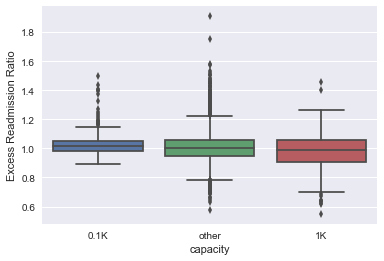

In [245]:
sns.boxplot(data=dt, x='capacity', y='Excess Readmission Ratio')

In [247]:
len(dt)

11578

In [251]:
dt_1000_avg_ERR, dt_1000_std_ERR, count_dt_1000

(0.9783342672413797, 0.11987768843246496, 464)

In [252]:
dt_100_avg_ERR, dt_100_std_ERR, count_dt_100

(1.0220883892068686, 0.058154457093236786, 1223)

In [265]:
# Standard Error --> SE, Margin of error --> ME
p_hat = abs(dt_1000_avg_ERR - dt_100_avg_ERR)

# Lets calculate the sigma of our POPULATION ... this is not the sample sigma.... we combine the sample sizes in our dt
# to combine two populations capacity >1000 and capacity < 100:

n = count_dt_1000 + count_dt_100

sigma = np.sqrt((dt_1000_std_ERR**2)+(dt_100_std_ERR**2))

SE = sigma/np.sqrt(n)
SE


# SE = np.sqrt(p_hat*(1-p_hat)/len(dt)) # or simply divide phat*(1-phat) by n or total sample size
# ME = 2*SE
# print('SE = {0:0.4f}, ME = {1:0.4f}'.format(SE, ME))

# # CI 
# CI_low = p_hat - 2*SE
# CI_up = p_hat + 2*SE
# print('CI_lower: {0:0.5f}, CI_upper: {1:0.5f}'.format(CI_low, CI_up))

# Z
P_population = 0
Z = (p_hat - P_population)/SE
print('z-stat:',Z)

z-stat: 13.4879366504


### Z-statistics is very high and p value therefore is close to 0. This Ho is rejected and there is a significant difference between the mean excess readmission rates of the two populations. In conclusion the hospitals with higher capacity, which in this study is greater than 1000 have lower ERR.

In [274]:
samp1 = dt_100['Excess Readmission Ratio']
samp2 = dt_1000['Excess Readmission Ratio']
stats.ttest_ind(samp1,samp2)

Ttest_indResult(statistic=10.029895332413446, pvalue=4.9142568500221855e-23)